In [10]:
! pip install numpy
! pip install networkx
! pip install pgmpy|
! pip install ipdb
! pip install yfinance
! pip install matplotlib
! pip install arviz
! pip install pymc
! pip install bambi
! pip install pyreadline
! pip install pygraphviz
! pip install pydot


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
zsh:1: parse error near `|'

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import networkx
import pickle
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pickle
import matplotlib.pyplot as plt
from pprint import pprint
import bambi as bmb
import xarray as xr
from StockEngine import StockEngine
from tqdm import tqdm
import ipdb

%config IPCompleter.greedy=True


In [7]:
def predictions_vol_file(tday):
    return f"predictions/{tday}_vol.pkl"

def predictions_corr_file(tday):
    return f"predictions/{tday}_corr.pkl"

with open("adj_mat.pkl", "rb") as f:
    G = pickle.load(f)
    
G.remove_node('DVA')
G.remove_node('ULTA')

tickers = list(G.nodes())

# UNCOMMENT IN FUTURE
# tickers = tickers[:5]

ticker_to_index = {}
for i, ticker in enumerate(tickers):
    ticker_to_index[ticker] = i
print(tickers)
print(ticker_to_index)
num_tickers = len(tickers)
corr_len = num_tickers * (num_tickers - 1) // 2

start_date = "2010-01-01"
end_date = "2021-01-01"

prediction_folder="predictions"

engine = StockEngine(tickers, start_date=start_date, end_date=end_date)

['CTSH', 'CI', 'CMS', 'ROST', 'JNJ', 'PFG', 'PAYX', 'AON', 'FIS', 'DXC', 'ROK', 'AMZN', 'ISRG', 'PNR', 'GWW', 'LNT', 'CE', 'NKE', 'MCO', 'AEP', 'TPR', 'UNH', 'NVR', 'XEL', 'TTWO', 'CMG', 'GIS', 'WST', 'CAT', 'XRAY', 'ANSS', 'QCOM', 'INTC', 'LIN', 'MU', 'GPC', 'ITW', 'EL', 'DXCM', 'COO', 'PKG', 'AMD', 'ETN', 'MHK', 'IEX', 'HON', 'MKC', 'MO', 'BIO', 'DIS', 'NFLX', 'RL', 'CSX', 'T', 'WM', 'TER', 'CRL', 'CL', 'JKHY', 'USB', 'COF', 'TFC', 'GS', 'AVB', 'UDR', 'ESS', 'HIG', 'PEAK', 'SYY', 'WAT', 'BWA', 'NEE', 'PPL', 'LLY', 'INCY', 'LVS', 'COST', 'XOM', 'SLB', 'DVN', 'WMB', 'PXD', 'EOG', 'PSA', 'TSCO', 'TAP']
{'CTSH': 0, 'CI': 1, 'CMS': 2, 'ROST': 3, 'JNJ': 4, 'PFG': 5, 'PAYX': 6, 'AON': 7, 'FIS': 8, 'DXC': 9, 'ROK': 10, 'AMZN': 11, 'ISRG': 12, 'PNR': 13, 'GWW': 14, 'LNT': 15, 'CE': 16, 'NKE': 17, 'MCO': 18, 'AEP': 19, 'TPR': 20, 'UNH': 21, 'NVR': 22, 'XEL': 23, 'TTWO': 24, 'CMG': 25, 'GIS': 26, 'WST': 27, 'CAT': 28, 'XRAY': 29, 'ANSS': 30, 'QCOM': 31, 'INTC': 32, 'LIN': 33, 'MU': 34, 'GPC': 3

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 534.21it/s]


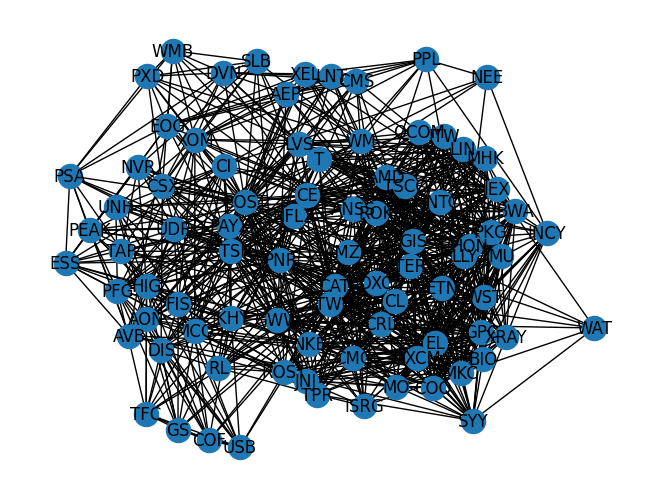

In [12]:

from networkx.drawing.nx_pydot import write_dot
pos = networkx.nx_agraph.graphviz_layout(G)
nx.draw(G, with_labels=True, pos=pos)
write_dot(G, 'file.dot')

In [4]:
import datetime

num_prev_trading_days = 126
months_to_evaluate = 12 # * 10
evaluation_year_month_start = "2012-01"

In [5]:
def convert_to_lower_triangular(A, dimension):
    C = np.zeros((A.shape[0], dimension, dimension))
    B = np.zeros((dimension, dimension))
    idx = np.tril_indices_from(B, -1)
    
    for i in range(len(A)):
        C[i][idx] = A[i]
    return C

In [6]:
def reconstruct_coefficients_vol(vol, ticker):
    return (
        vol[ticker].posterior['alpha'][0][-1].to_numpy(),
        vol[ticker].posterior['betas_day'][0][-1].to_numpy(),
        vol[ticker].posterior['betas_week'][0][-1].to_numpy(),
        vol[ticker].posterior['betas_month'][0][-1].to_numpy(),
    )

def reconstruct_coefficients_corr(corr):
    return (
        corr.posterior['alpha'][0][-1].to_numpy(),
        corr.posterior['betas_day'][0][-1].to_numpy(),
        corr.posterior['betas_week'][0][-1].to_numpy(),
        corr.posterior['betas_month'][0][-1].to_numpy(),
    )

In [141]:
def make_prediction(tday, vol, corr):
    _, RVt1, RVt25, RVt626, _, xt1, xt25, xt626 = engine.get_HAR_DRD_data(tday)
    
    # Reconstruct RV_t
    predicted_RV_t = np.zeros(num_tickers)
    for ticker_index in range(num_tickers):
        ticker = tickers[ticker_index]
        
        neighbors = list(G.adj[ticker].keys())
        alpha, betas_day, betas_week, betas_month = vol[ticker]
        
        predicted_RV_t[ticker_index] += alpha
        predicted_RV_t[ticker_index] += betas_day[0] * RVt1[ticker_index]
        predicted_RV_t[ticker_index] += betas_week[0] * RVt25[ticker_index]
        predicted_RV_t[ticker_index] += betas_month[0] * RVt626[ticker_index]
        
        for i, neighbor_ticker in enumerate(neighbors):
            neighbor_ticker_index = ticker_to_index[neighbor_ticker]
            predicted_RV_t[ticker_index] += betas_day[i+1] * RVt1[neighbor_ticker_index] 
            predicted_RV_t[ticker_index] += betas_week[i+1] * RVt25[neighbor_ticker_index] 
            predicted_RV_t[ticker_index] += betas_month[i+1] * RVt626[neighbor_ticker_index] 
    
    
    # Reconstruct R_t
    alpha, betas_day, betas_week, betas_month = corr
    predicted_R_t = alpha + betas_day * xt1 + betas_week * xt25 + betas_month * xt626

    if (predicted_R_t > 1).any():
        assert False
    if (predicted_R_t < -1).any():
        assert False
    
    D_t = np.diag(np.sqrt(predicted_RV_t))
    R_t = np.zeros((num_tickers, num_tickers))
    R_t[np.tril_indices_from(R_t, -1)] = predicted_R_t
    R_t += R_t.T
    
    H_t = D_t @ R_t @ D_t
    
    return H_t
    
# Old code under the assumption we had unique coeff for each :3
#     predicted_R_t = np.zeros(corr_len)
#     indices = np.tril_indices_from(np.zeros((num_tickers, num_tickers)))
#     indices_list = list(zip(new_idx[0], new_idx[1]))
#     for idx, (ticker_1_index, ticker_2_index) in enumerate(indices_list):
#         alpha, betas_day, betas_week, betas_month = reconstruct_coefficients(vol, ticker)
        
#         predicted_R_t[idx] += 
        
    

In [142]:
def loss_frobenius(cov1, cov2):
    return np.linalg.norm(cov1 - cov2, ord='fro')

2012-01-03 Loss 0.5509729948903133


 68%|███████████████████████████████████████████████████████████████████████▋                                 | 249/365 [00:31<00:14,  7.91it/s]


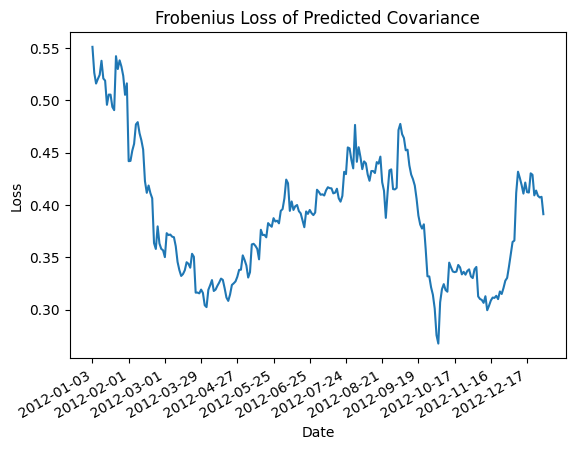

2013-01-02 Loss 0.3103455565972226


 69%|████████████████████████████████████████████████████████████████████████▏                                | 251/365 [00:30<00:14,  8.12it/s]


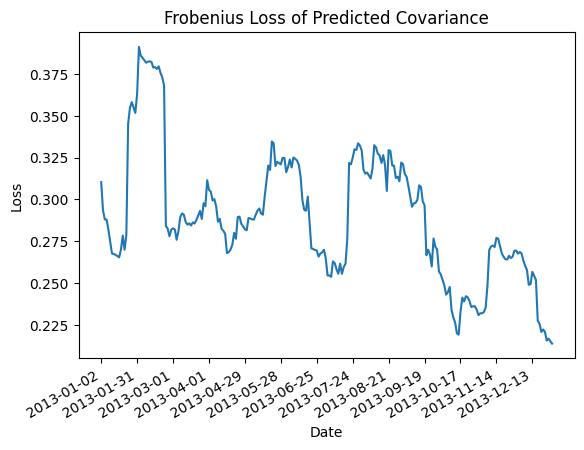

2014-01-02 Loss 0.21543760673922197


 69%|████████████████████████████████████████████████████████████████████████▏                                | 251/365 [00:30<00:13,  8.18it/s]


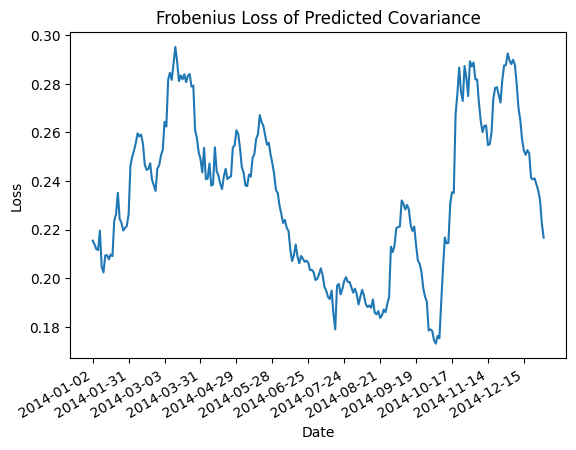

2015-01-02 Loss 0.16470221266407645


 69%|████████████████████████████████████████████████████████████████████████▏                                | 251/365 [00:30<00:13,  8.16it/s]


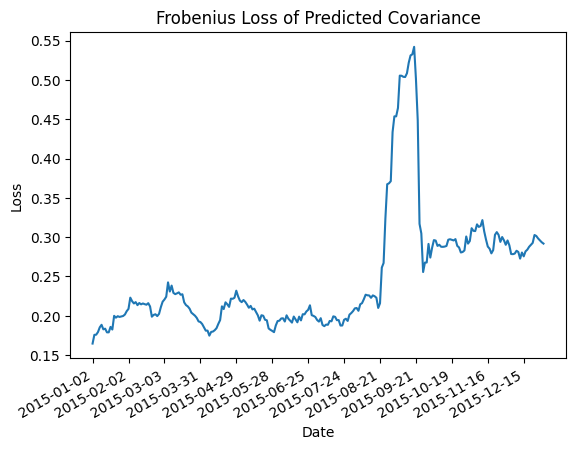

2016-01-04 Loss 0.3256592510594711


 69%|████████████████████████████████████████████████████████████████████████▏                                | 251/365 [00:33<00:15,  7.56it/s]


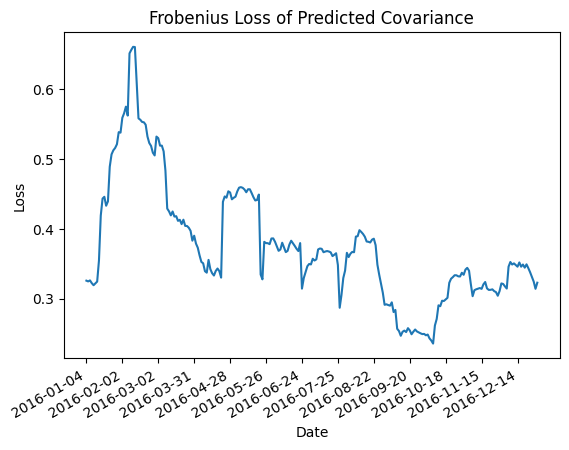

2017-01-03 Loss 0.21993989937031475


 68%|███████████████████████████████████████████████████████████████████████▉                                 | 250/365 [00:33<00:15,  7.55it/s]


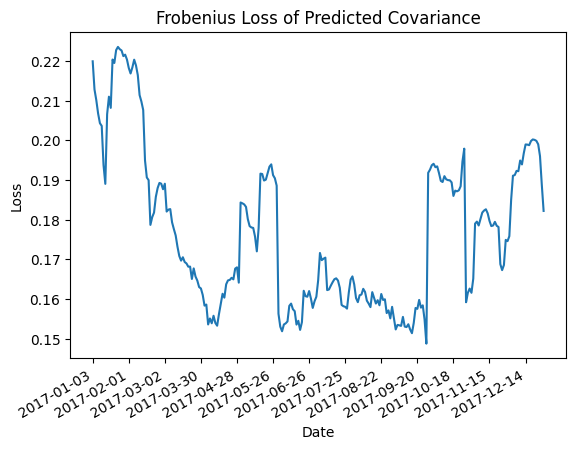

2018-01-02 Loss 0.2950587607194886


 68%|███████████████████████████████████████████████████████████████████████▉                                 | 250/365 [00:31<00:14,  7.97it/s]


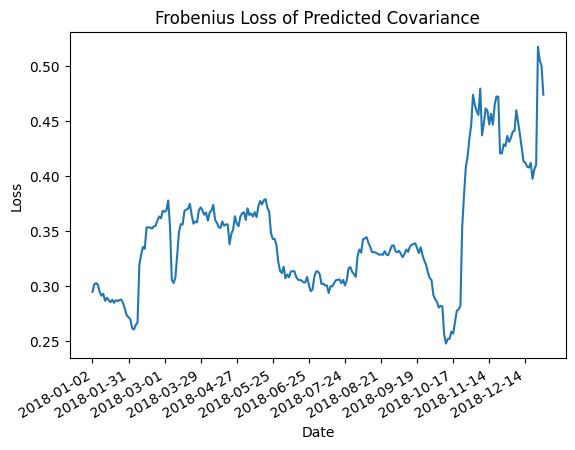

2019-01-02 Loss 0.47847006872414866


 69%|████████████████████████████████████████████████████████████████████████▏                                | 251/365 [00:31<00:14,  8.10it/s]


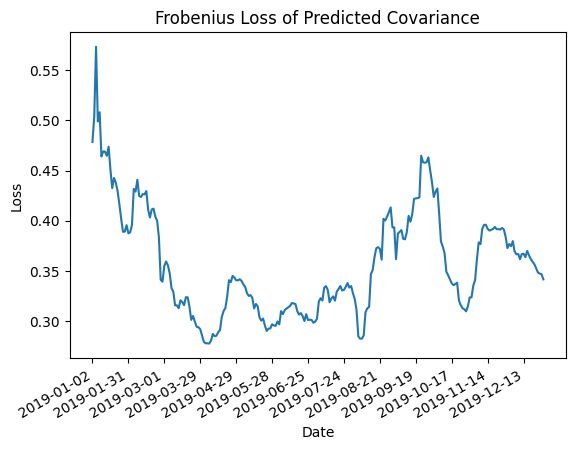

2020-01-02 Loss 1.169675625347183


 69%|████████████████████████████████████████████████████████████████████████▍                                | 252/365 [00:31<00:13,  8.09it/s]


IndexError: list index out of range

In [143]:
import pandas as pd
import matplotlib.dates as mdates
import csv

USE_YEARLY = True

def dump_list_as_csv(data, filepath):
    with open(filepath, 'w') as csvfile:
        writer = csv.writer(csvfile)
        for row in data:
            writer.writerow(row)

def make_yearly_prediction_starting_from(tday, vol, corr):
    start_year = tday[:4]
    timestamps = []
    losses = []
    
    for _ in tqdm(range(365)):
        predicted_H_t = make_prediction(tday, vol, corr)
        H_t, _, _, _ = engine.get_HAR_DRD(tday)
        loss = loss_frobenius(predicted_H_t, H_t)
        timestamps.append(tday)
        losses.append(loss)
        
        tday = engine.get_shift_tday(tday, 1)
        if tday[:4] != start_year:
            break
#     dates = pd.to_datetime(timestamps)

    dump_list_as_csv(zip(timestamps, losses), f"predictions/{start_year}_loss.csv")

    plt.plot(timestamps, losses)
    plt.xlabel("Date")
    plt.ylabel("Loss")
    plt.gcf().autofmt_xdate()
    plt.xticks(timestamps[0::20])
    plt.title("Frobenius Loss of Predicted Covariance")
    plt.savefig("prediction_figs/loss-" + start_year + ".png")
    plt.show()
    
    with open(f"predictions/{start_year}_loss.pkl", "wb") as f:
        pickle.dump({"timestamps" : timestamps, "losses" : losses}, f)
    
    return (timestamps, losses)

all_timestamps = []
all_losses = []
all_predicted_H_t = {}

for month_diff in range(months_to_evaluate):
    if USE_YEARLY:
        year_month = engine.get_shift_month(evaluation_year_month_start, month_diff * 12)
    else:
        year_month = engine.get_shift_month(evaluation_year_month_start, month_diff) 
        
    start_day = 1
    tday = year_month + "-{:02d}".format(start_day)
    if tday[:4] == "2021":
        break
    while tday not in engine.trading_day_list:
        start_day += 1
        tday = year_month + "-{:02d}".format(start_day) 

    with open(predictions_vol_file(tday), "rb") as f:
        vol = pickle.load(f)
    with open(predictions_corr_file(tday), "rb") as f:
        corr = pickle.load(f)
        
    predicted_H_t = make_prediction(tday, vol, corr)
    all_predicted_H_t[tday] = predicted_H_t
    H_t, _, _, _ = engine.get_HAR_DRD(tday)
    loss = loss_frobenius(predicted_H_t, H_t)
    print(f"{tday} Loss", loss)
    
    timestamps, losses = make_yearly_prediction_starting_from(tday, vol, corr)
    all_timestamps += timestamps
    all_losses += losses
    
#     with open(f"evaluation/{tday}_evaluation.pkl", "wb") as f:
#         pickle.dump({"predicted_H_t" : predicted_H_t,
#                 "H_t" : H_t,
#                 "loss": loss
#                }, f)
#     losses.append(loss)

In [144]:
with open(f"predictions/all_predicted_H_t.pkl", "wb") as f:
    pickle.dump(all_predicted_H_t, f)
    
dump_list_as_csv(zip(all_timestamps, all_losses), f"predictions/all_loss.csv")

In [145]:
all_predicted_H_t

{'2012-01-03': array([[0.        , 0.02191573, 0.01969866, ..., 0.01257135, 0.01061694,
         0.01011694],
        [0.02191573, 0.        , 0.0073307 , ..., 0.00238413, 0.00337541,
         0.00341221],
        [0.01969866, 0.0073307 , 0.        , ..., 0.00187319, 0.00244281,
         0.00360936],
        ...,
        [0.01257135, 0.00238413, 0.00187319, ..., 0.        , 0.00122121,
         0.00110431],
        [0.01061694, 0.00337541, 0.00244281, ..., 0.00122121, 0.        ,
         0.0014563 ],
        [0.01011694, 0.00341221, 0.00360936, ..., 0.00110431, 0.0014563 ,
         0.        ]]),
 '2013-01-02': array([[0.        , 0.01774958, 0.00786801, ..., 0.00921706, 0.00677772,
         0.00625287],
        [0.01774958, 0.        , 0.00561946, ..., 0.00220401, 0.00360459,
         0.00477422],
        [0.00786801, 0.00561946, 0.        , ..., 0.00109808, 0.0015092 ,
         0.0018331 ],
        ...,
        [0.00921706, 0.00220401, 0.00109808, ..., 0.        , 0.00091949,
      

In [146]:
# Create plot comparing baseline & UGM
def load_csv(file_name):
    data = []
    with open(file_name, "r") as csv_file:
        reader = csv.reader(csv_file)
        for row in reader:
            data.append(row)
    return data

baseline_loss = load_csv("HAR_DRD_eval.csv")
ugm_loss = load_csv("predictions/all_loss.csv")

/tmp/ipykernel_283494/2774157944.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  baseline_vals = losses[:, 0, 1].astype(np.float)
/tmp/ipykernel_283494/2774157944.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ugm_vals = losses[:, 1, 1].astype(np.float)


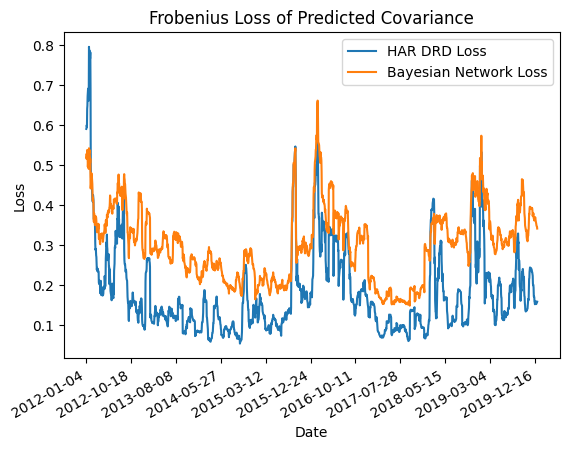

In [147]:
def plot_baseline_vs_ugm_loss(baseline_loss, ugm_loss):
    losses = np.array(list(zip(baseline_loss, ugm_loss))[1:])
    baseline_vals = losses[:, 0, 1].astype(np.float)
    ugm_vals = losses[:, 1, 1].astype(np.float)
    dates = losses[:, 1, 0]
    
    plt.clf()
    plt.plot(dates, baseline_vals, label="HAR DRD Loss")
    plt.plot(dates, ugm_vals, label="Bayesian Network Loss")
    plt.xlabel("Date")
    plt.ylabel("Loss")
    plt.gcf().autofmt_xdate()
    plt.xticks(dates[0::200])
    plt.title("Frobenius Loss of Predicted Covariance")
    plt.legend()
    plt.show()
plot_baseline_vs_ugm_loss(baseline_loss, ugm_loss)

In [69]:
baseline_df

,0,1
0,2012-01-04,0.5904461129411129
1,2012-01-05,0.5920822441493151
2,2012-01-06,0.5996786430326126
3,2012-01-09,0.5961529519984814
4,2012-01-10,0.6407699323822327
...,...,...
2745,2022-11-30,0.3970871572099751
2746,2022-12-01,0.4004667595923226
2747,2022-12-02,0.35598429695214556
2748,2022-12-05,0.32768465652706796


In [109]:
with open(f"predictions/all_predicted_H_t.pkl", "rb") as f:
    all_predicted_H_t = pickle.load(f)
    

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00697888,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00425895,  0.0082842 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0249343 ,  0.00295902,  0.0012944 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00092143,  0.00799095,  0.00512587, ..., -0.00047796,
         0.        ,  0.        ],
       [ 0.00584516,  0.00901964,  0.0048922 , ...,  0.00382849,
         0.00814207,  0.        ]])

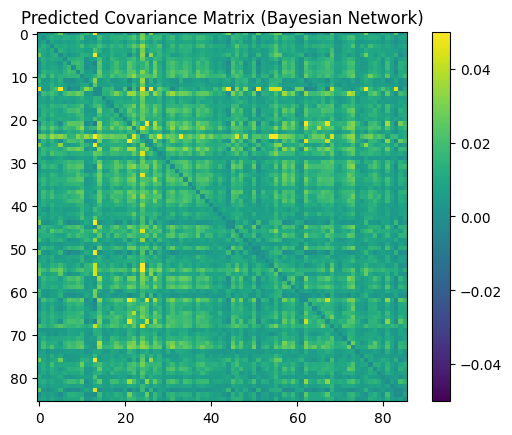

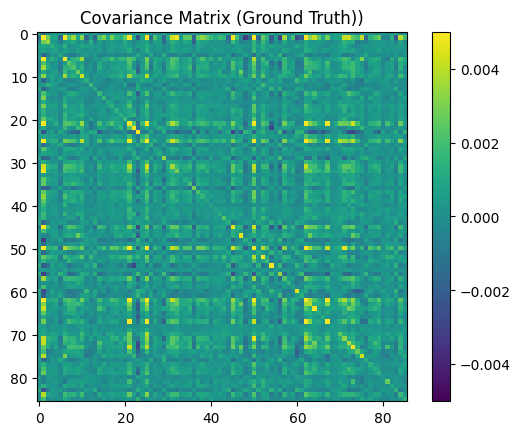

In [140]:
def investigate_H_t(tday):
    predicted_H_t = all_predicted_H_t[tday]
    Ht, _, _, _ = engine.get_HAR_DRD(tday)

    plt.title("Predicted Covariance Matrix (Bayesian Network)")
    plt.imshow(predicted_H_t, vmin=-0.05, vmax=0.05)
    plt.colorbar()
    plt.show()
    
    plt.title("Covariance Matrix (Ground Truth))")
    plt.imshow(H_t, vmin=-0.005, vmax = 0.005)
    plt.colorbar()
    plt.show()
    
investigate_H_t('2020-01-02')